# **Data Selection**

#Load the Dataset

In [1]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate 5000 rows of data
num_samples = 5000

# Randomly generate features
size = np.random.randint(800, 5000, num_samples)  # House size in sqft
location = np.random.choice(["Urban", "Suburban", "Rural"], num_samples)  # Location type
rooms = np.random.randint(1, 8, num_samples)  # Number of rooms
base_price = size * 150 + rooms * 12000  # Base price formula

# Adjust price based on location (Urban > Suburban > Rural)
price = []
for i in range(num_samples):
    if location[i] == "Urban":
        price.append(base_price[i] * 1.3)
    elif location[i] == "Suburban":
        price.append(base_price[i] * 1.1)
    elif location[i] == "Rural":
        price.append(base_price[i] * 0.9)

# Create DataFrame
df = pd.DataFrame({
    "Size": size,
    "Location": location,
    "Number of Rooms": rooms,
    "Price": np.round(price, 2)
})

# Save as CSV
df.to_csv("house_prices.csv", index=False)

# Display first few rows
print(df.head())
print(f"\nDataset saved as 'house_prices.csv' with {len(df)} rows.")


   Size  Location  Number of Rooms     Price
0  1660     Urban                7  432900.0
1  4572     Urban                6  985140.0
2  3892  Suburban                5  708180.0
3  1266  Suburban                3  248490.0
4  4244     Urban                2  858780.0

Dataset saved as 'house_prices.csv' with 5000 rows.


#observe the data

In [2]:
df.head()

,Size,Location,Number of Rooms,Price
0,1660,Urban,7,432900.0
1,4572,Urban,6,985140.0
2,3892,Suburban,5,708180.0
3,1266,Suburban,3,248490.0
4,4244,Urban,2,858780.0


In [3]:
df.sample(8)

,Size,Location,Number of Rooms,Price
3100,2093,Rural,4,325755.0
1738,4937,Rural,1,677295.0
2784,3545,Suburban,5,650925.0
2854,4609,Suburban,5,826485.0
3722,4943,Urban,4,1026285.0
3492,1449,Urban,5,360555.0
4211,2976,Urban,3,627120.0
2223,2515,Rural,5,393525.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Size             5000 non-null   int64  
 1   Location         5000 non-null   object 
 2   Number of Rooms  5000 non-null   int64  
 3   Price            5000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 156.4+ KB


In [5]:
df.describe()

,Size,Number of Rooms,Price
count,5000.000000,5000.000000,5.000000e+03
mean,2933.856600,4.029000,5.387390e+05
std,1206.430267,1.983569,2.180946e+05
min,801.000000,1.000000,1.209600e+05
25%,1875.250000,2.000000,3.628688e+05
50%,2950.500000,4.000000,5.304450e+05
75%,3988.000000,6.000000,6.936150e+05
max,4999.000000,7.000000,1.076985e+06


# Load and explore the data

**check missing values**

In [8]:
df = pd.read_csv("house_prices.csv")
print(df.isnull().sum())

Size               0
Location           0
Number of Rooms    0
Price              0
dtype: int64


# Analyze distributions of numerical variables (e.g., Size, Price).

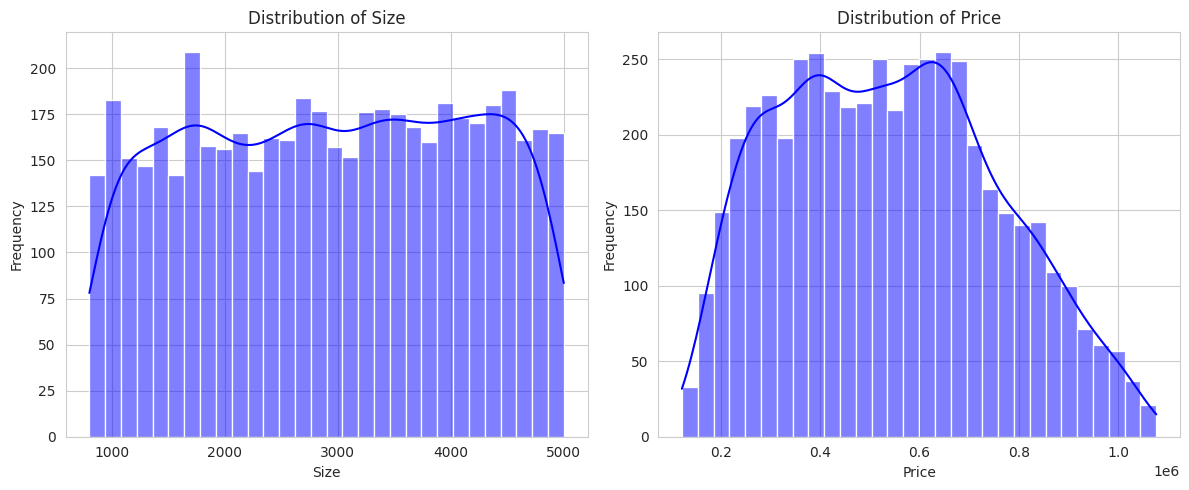

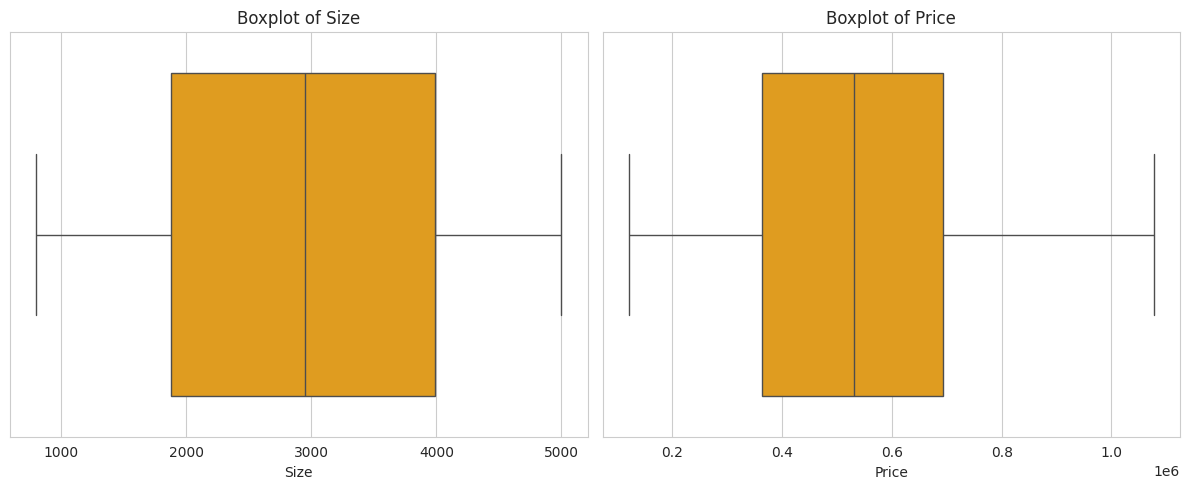

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_style("whitegrid")

# List of numerical columns to analyze
num_cols = ["Size", "Price"]

# Plot histograms and KDE for numerical variables
plt.figure(figsize=(12, 5))
for i, col in enumerate(num_cols):
    plt.subplot(1, 2, i + 1)
    sns.histplot(df[col], bins=30, kde=True, color="blue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Boxplots to detect outliers
plt.figure(figsize=(12, 5))
for i, col in enumerate(num_cols):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(x=df[col], color="orange")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

# Identify potential outliers that might skew results. here i used IQR

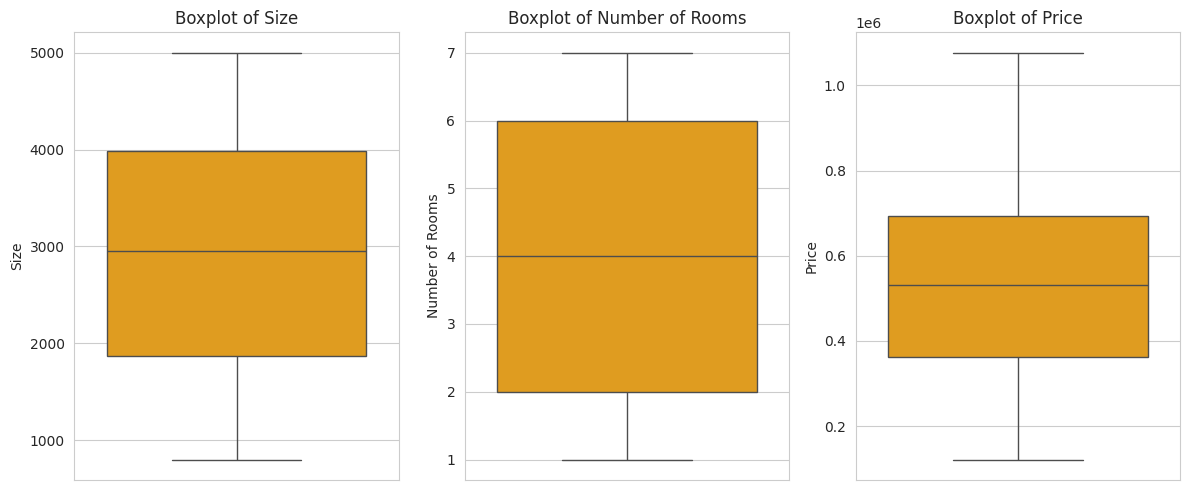


Outliers detected using Z-score method:
Size               0
Number of Rooms    0
Price              0
dtype: int64

Outliers detected using IQR method:
Size               0
Number of Rooms    0
Price              0
dtype: int64


In [11]:
from scipy.stats import zscore
sns.set_style("whitegrid")

# Define numerical columns to check for outliers
num_cols = ["Size", "Number of Rooms", "Price"]

###  Boxplot Method (Visual Detection)
plt.figure(figsize=(12, 5))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col], color="orange")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

###  Z-Score Method (Mathematical Outlier Detection)
z_scores = np.abs(zscore(df[num_cols]))  # Compute Z-scores
threshold = 3  # Define threshold (values >3 or <-3 are considered outliers)
outliers_zscore = (z_scores > threshold).sum()

print("\nOutliers detected using Z-score method:")
print(outliers_zscore)

### IQR Method (Interquartile Range)
Q1 = df[num_cols].quantile(0.25)  # 25th percentile
Q3 = df[num_cols].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range
lower_bound = Q1 - 1.5 * IQR  # Lower threshold
upper_bound = Q3 + 1.5 * IQR  # Upper threshold

# Detect outliers
outliers_iqr = ((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)).sum()

print("\nOutliers detected using IQR method:")
print(outliers_iqr)

# **Data Preprocessing**

# Normalize Numeric data

In [12]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler



# Select numerical features to scale
num_cols = ["Size", "Number of Rooms"]

#  Min-Max Scaling (values between 0 and 1)
min_max_scaler = MinMaxScaler()
df_minmax = df.copy()  # Copy of original data
df_minmax[num_cols] = min_max_scaler.fit_transform(df_minmax[num_cols])

#  Standardization (Z-score scaling)
standard_scaler = StandardScaler()
df_standard = df.copy()  # Copy of original data
df_standard[num_cols] = standard_scaler.fit_transform(df_standard[num_cols])

# Display first few rows
print("\nOriginal Data:")
print(df.head())

print("\nMin-Max Scaled Data:")
print(df_minmax.head())

print("\nStandardized Data:")
print(df_standard.head())

# Save normalized datasets (optional)
df_minmax.to_csv("house_prices_minmax.csv", index=False)
df_standard.to_csv("house_prices_standardized.csv", index=False)



Original Data:
   Size  Location  Number of Rooms     Price
0  1660     Urban                7  432900.0
1  4572     Urban                6  985140.0
2  3892  Suburban                5  708180.0
3  1266  Suburban                3  248490.0
4  4244     Urban                2  858780.0

Min-Max Scaled Data:
       Size  Location  Number of Rooms     Price
0  0.204621     Urban         1.000000  432900.0
1  0.898285     Urban         0.833333  985140.0
2  0.736303  Suburban         0.666667  708180.0
3  0.110767  Suburban         0.333333  248490.0
4  0.820152     Urban         0.166667  858780.0

Standardized Data:
       Size  Location  Number of Rooms     Price
0 -1.055995     Urban         1.497955  432900.0
1  1.357979     Urban         0.993763  985140.0
2  0.794277  Suburban         0.489571  708180.0
3 -1.382611  Suburban        -0.518814  248490.0
4  1.086076     Urban        -1.023006  858780.0


# Encoding Categorical features

In [13]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


###  One-Hot Encoding (Recommended for Location - Non-Ordinal)
df_ohe = df.copy()  # Copy of original data
df_ohe = pd.get_dummies(df_ohe, columns=["Location"], drop_first=True)  # Avoid dummy variable trap

###  Label Encoding (If Location Had an Ordinal Relationship)
df_label = df.copy()  # Copy of original data
label_encoder = LabelEncoder()
df_label["Location"] = label_encoder.fit_transform(df_label["Location"])

# Display first few rows
print("\nOne-Hot Encoded Data:")
print(df_ohe.head())

print("\nLabel Encoded Data:")
print(df_label.head())

# Save encoded datasets (optional)
df_ohe.to_csv("house_prices_ohe.csv", index=False)
df_label.to_csv("house_prices_label.csv", index=False)



One-Hot Encoded Data:
   Size  Number of Rooms     Price  Location_Suburban  Location_Urban
0  1660                7  432900.0              False            True
1  4572                6  985140.0              False            True
2  3892                5  708180.0               True           False
3  1266                3  248490.0               True           False
4  4244                2  858780.0              False            True

Label Encoded Data:
   Size  Location  Number of Rooms     Price
0  1660         2                7  432900.0
1  4572         2                6  985140.0
2  3892         1                5  708180.0
3  1266         1                3  248490.0
4  4244         2                2  858780.0


# **Feature Selection**

# Analyze Predictions

Correlation analysis

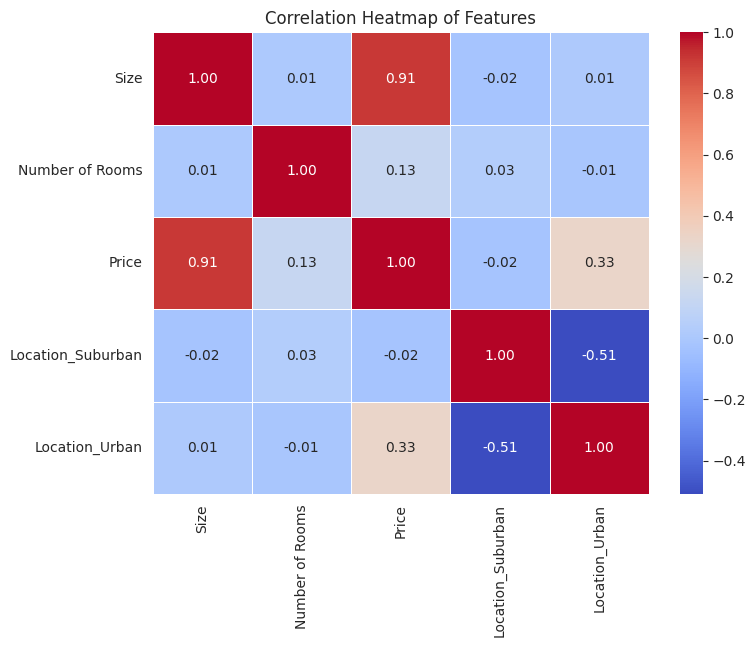


Correlation of Features with Price:
Price                1.000000
Size                 0.912423
Location_Urban       0.325188
Number of Rooms      0.125811
Location_Suburban   -0.022135
Name: Price, dtype: float64


In [14]:
# Convert categorical "Location" using One-Hot Encoding
df = pd.get_dummies(df, columns=["Location"], drop_first=True)

# Compute correlation matrix
correlation_matrix = df.corr()

# Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

# Display correlation of features with Price
correlation_with_price = correlation_matrix["Price"].sort_values(ascending=False)
print("\nCorrelation of Features with Price:")
print(correlation_with_price)

 removing low-impact predictors to improve model performance.


In [15]:
df_ohe.to_csv("house_prices_ohe.csv", index=False)

In [16]:
df_ohe.head()

,Size,Number of Rooms,Price,Location_Suburban,Location_Urban
0,1660,7,432900.0,False,True
1,4572,6,985140.0,False,True
2,3892,5,708180.0,True,False
3,1266,3,248490.0,True,False
4,4244,2,858780.0,False,True


In [17]:
# Drop weak predictors (e.g., Location_Suburban if correlation < 0.3)
df_ohe.head()
df_ohe = df_ohe.drop(columns=["Location_Suburban"])

In [18]:
df_ohe.head()

,Size,Number of Rooms,Price,Location_Urban
0,1660,7,432900.0,True
1,4572,6,985140.0,True
2,3892,5,708180.0,False
3,1266,3,248490.0,False
4,4244,2,858780.0,True


# **Model Training**

# Train-Test Split

In [22]:
# Define features (X) and target variable (y)
X = df.drop(columns=["Price"])
y = df["Price"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train a Linear Regression Model:

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Make predictions

In [24]:
y_pred = model.predict(X_test)


# Accuracy Score

In [30]:
score=model.predict(X_test)
score=model.score(X_test,y_test)
print("model accuracy:",score)

model accuracy: 0.9814513527671137


# **Result house prive based on give data inputs**

In [35]:
import numpy as np

# Take user input for all required features
size = float(input("Enter the size of the house (sq ft): "))
rooms = int(input("Enter the number of rooms: "))
location_urban = input("Is the location urban? (yes/no): ").strip().lower()
location_rural = input("Is the location rural? (yes/no): ").strip().lower()


# Convert location to binary format (1 for Urban/Rural, 0 for other)
location_urban = 1 if location_urban == "yes" else 0
location_rural = 1 if location_rural == "yes" else 0

# Format the input into the correct shape (a 2D array)
features = np.array([[size, rooms, location_urban, location_rural]])  # Include both location features

# Make prediction using the trained model
prediction = model.predict(features)

# Display the predicted price
print(f"Predicted price of the house: ${prediction[0]:,.2f}")

Enter the size of the house (sq ft): 12000
Enter the number of rooms: 5
Is the location urban? (yes/no): yes
Is the location rural? (yes/no): no
Predicted price of the house: $8,301,695,530.34


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **Model Evaluation**

# Evaluation Metrics

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predictions on test data
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R² Score
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R² Score): {r2:.4f}")


Root Mean Squared Error (RMSE): 29621.17
R-squared (R² Score): 0.9815


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 20884.15594875108
Mean Squared Error (MSE): 877413456.0852387
Root Mean Squared Error (RMSE): 29621.16567735373
R-squared (R²): 0.9814513527671138


# Predictions:
○ Outputs for the test data including predicted vs. actual prices.

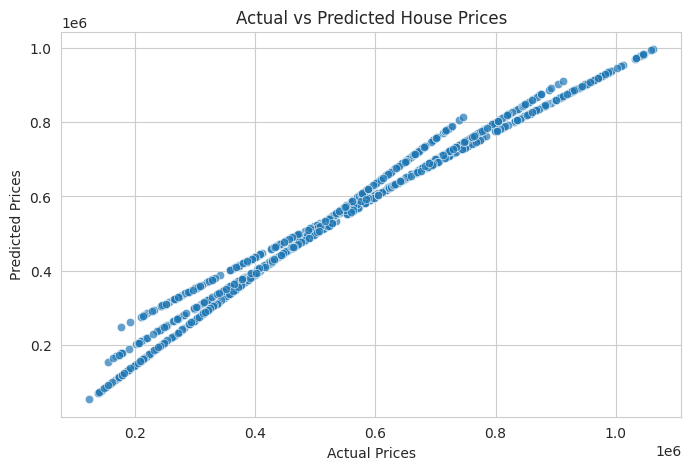

In [28]:
# Scatter Plot: Actual vs Predicted Prices
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


# Total Code in one cell

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Size             5000 non-null   int64  
 1   Location         5000 non-null   object 
 2   Number of Rooms  5000 non-null   int64  
 3   Price            5000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 156.4+ KB
None
              Size  Number of Rooms         Price
count  5000.000000      5000.000000  5.000000e+03
mean   2933.856600         4.029000  5.387390e+05
std    1206.430267         1.983569  2.180946e+05
min     801.000000         1.000000  1.209600e+05
25%    1875.250000         2.000000  3.628688e+05
50%    2950.500000         4.000000  5.304450e+05
75%    3988.000000         6.000000  6.936150e+05
max    4999.000000         7.000000  1.076985e+06

Missing Values:
 Size               0
Location           0
Number of Rooms    0
Price             

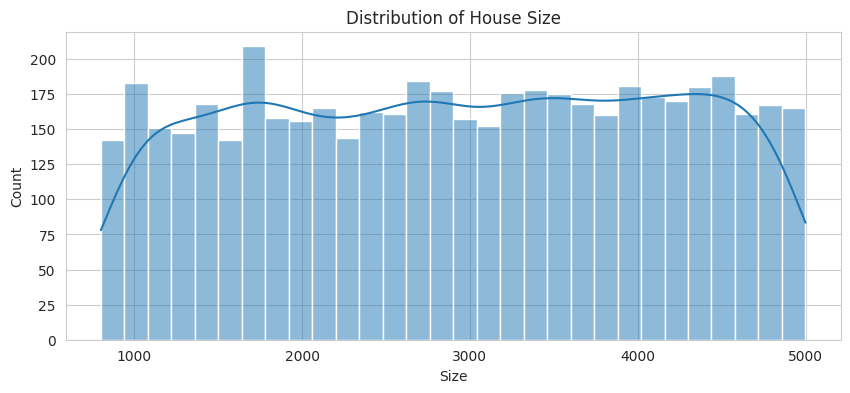

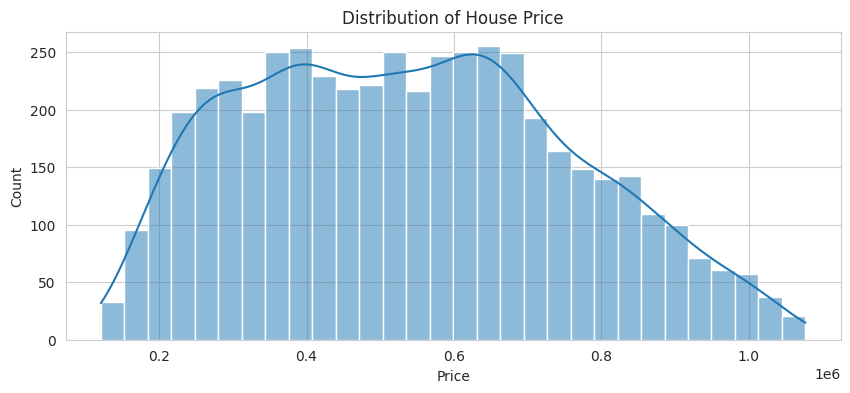

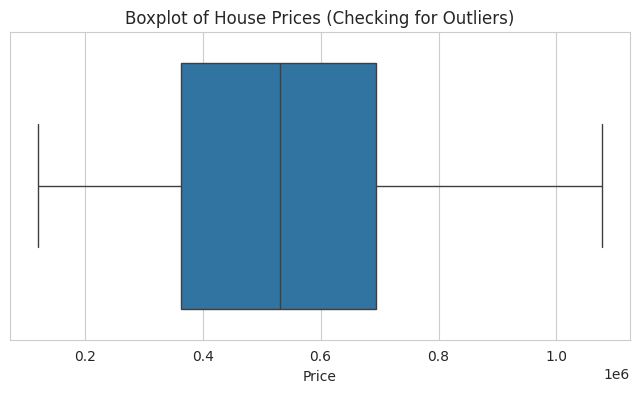

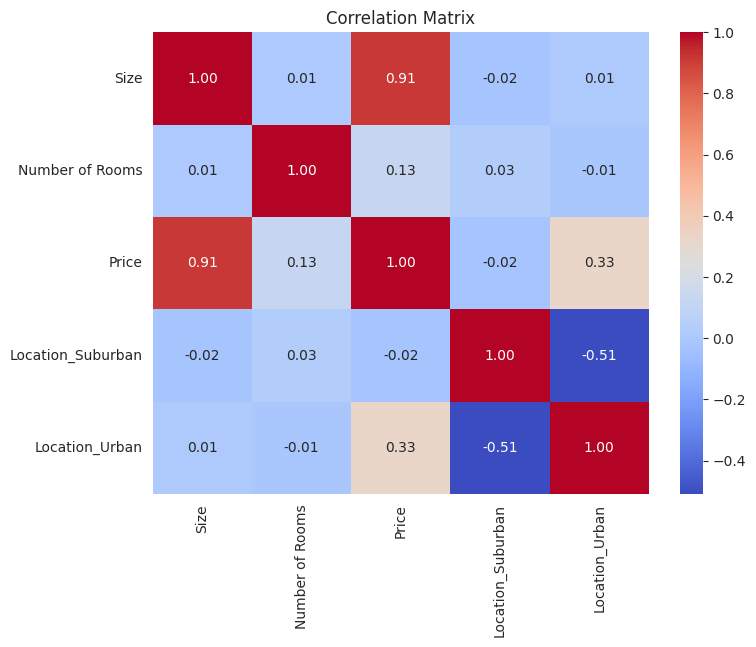

Root Mean Square Error (RMSE): 29621.17
R² Score: 0.98


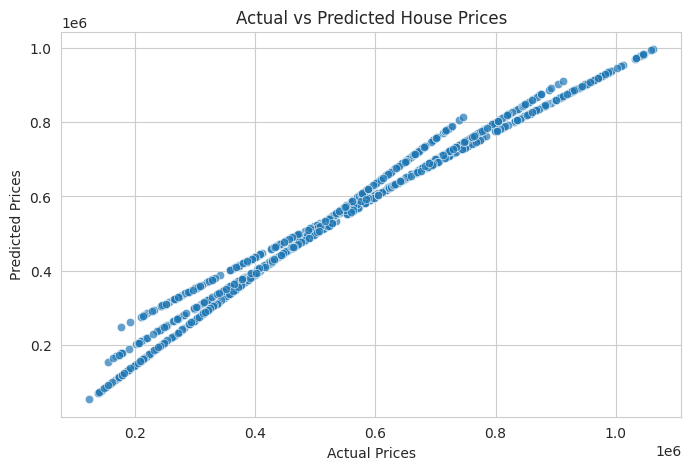

In [29]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("house_prices.csv")

# Display basic info
print(df.info())
print(df.describe())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Handle missing values (drop or impute)
df = df.dropna()  # Dropping rows with missing values for simplicity

# Explore distributions of numerical features
plt.figure(figsize=(10, 4))
sns.histplot(df["Size"], kde=True, bins=30)
plt.title("Distribution of House Size")
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(df["Price"], kde=True, bins=30)
plt.title("Distribution of House Price")
plt.show()

# Detect outliers using boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Price"])
plt.title("Boxplot of House Prices (Checking for Outliers)")
plt.show()

# Feature Engineering: Normalize Numerical Features
scaler = MinMaxScaler()
df[["Size", "Number of Rooms"]] = scaler.fit_transform(df[["Size", "Number of Rooms"]])

# Encode Categorical Feature (One-Hot Encoding for Location)
df = pd.get_dummies(df, columns=["Location"], drop_first=True)

# Correlation Analysis
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Define features (X) and target variable (y)
X = df.drop(columns=["Price"])
y = df["Price"]

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Square Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Scatter Plot: Actual vs Predicted Prices
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
